## CLARA

In [1]:
#Importing the required Libraries

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random
from matplotlib.pyplot import scatter
import collections
import matplotlib.pyplot as plt

In [3]:
'''
Loading the dataset 
making it suitable for clustering
'''
df = pd.read_csv('iBeacon_RSSI_Labeled.csv')
df.drop(['location','date'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)
print('shape of data = ',df.shape)
df.head()

shape of data =  (648, 13)


,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
5,-200,-200,-82,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
6,-200,-200,-80,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
7,-200,-200,-86,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [4]:
'''
Select the initial seeds for clustering based on distance
data = dataset in the form of Array
k = number of cluster needed
lst = list containing index of initial seeds
mat = distance matrix
'''

def initial_k(data,k):
    mat = euclidean_distances(data)
    lst = []
    a = np.random.randint(0,len(mat))
    lst.append(a)
    dis = np.zeros(len(data))
    for j in range(k-1):
        for i in range(len(data)):
            dis+= mat[:,a]
        a = np.argmax(dis)
        lst.append(a)
    return lst,mat

In [5]:
'''
Make cluster based on the nearest distance from seeds
mat = distance matrix
ini = list containing index of seeds
cluster = an array represing ith index as the cluster number of that index data point
cost = total sum of intra class ecludian distance of data
'''

def make_cluster(mat,ini):
    cost = 0
    cluster = np.zeros(len(mat))
    for i in range(len(mat)):
        minimum = np.inf 
        for j in range(len(ini)):
            if mat[i,ini[j]]<minimum:
                cluster[i] = j+1
                minimum = mat[i,ini[j]]
        cost+=minimum
    return cluster,cost

In [6]:
'''
Update cluster seeds to get saturated cluster on subset of data
data = data = dataset in the form of Array
k = number of cluster needed
max_iter = Maximum number of iteration 
ini = list containing index of seeds
'''

def PAM(data,k,max_iter=50):
    #data = df.values
    ini,mat = initial_k(data,k)
    cluster,cost = make_cluster(mat,ini)
    for i in range(max_iter):
        swap = random.randint(0,len(data)-1)
        if swap in ini:
            continue
        else:
            for j in range(k):
                tmp = ini[j]
                ini[j]=swap
                cluster1,cost1=make_cluster(mat,ini)
                if cost > cost1:
                    cluster = cluster1
                    cost = cost1
                    continue
                else:
                    ini[j] = tmp
    return ini

In [26]:
'''
applying PAM on subset of Data and get the best cluster
df = data on which clustering need to applied
k = number of cluster 
sample_size = size of subset of data
iteration = number of time suset of data has to taken
cluster = an array represing ith index as the cluster number of that index data point
cost = total sum of intra class ecludian distance of data
'''

def clara(df, k,sample_size=100,iteration=10):
    data = df.values
    cost = np.inf
    cluster = np.zeros(len(df))
    mat = euclidean_distances(data)
    for i in range(iteration):
        subset = df.sample(n=sample_size,replace=True)
        subset = subset.values
        seeds = PAM(subset,k)
        cluster1, cost1 = make_cluster(mat,seeds)
        if cost1<cost:
            cost = cost1
            cluster = cluster1
    return cost,cluster

In [43]:
clara(df,5,100,50)

(92000.06109814173,
 array([1., 1., 3., 1., 1., 3., 1., 4., 3., 5., 1., 4., 4., 2., 5., 2., 4.,
        3., 1., 2., 1., 2., 4., 5., 4., 2., 1., 4., 1., 3., 3., 3., 4., 3.,
        5., 4., 1., 2., 3., 4., 2., 3., 4., 3., 3., 1., 3., 4., 4., 4., 3.,
        1., 3., 4., 4., 2., 2., 5., 3., 1., 4., 2., 3., 3., 3., 2., 2., 3.,
        5., 4., 5., 1., 5., 3., 5., 1., 4., 1., 4., 4., 3., 1., 1., 4., 3.,
        1., 3., 1., 1., 3., 1., 4., 1., 1., 1., 1., 5., 3., 3., 4., 1., 4.,
        1., 2., 1., 1., 4., 1., 1., 3., 3., 1., 1., 1., 3., 1., 3., 5., 1.,
        3., 1., 3., 4., 5., 5., 3., 1., 4., 3., 1., 4., 5., 2., 3., 1., 1.,
        3., 3., 1., 3., 3., 2., 1., 3., 4., 3., 1., 4., 2., 4., 1., 4., 4.,
        1., 1., 4., 3., 4., 1., 3., 2., 4., 3., 4., 3., 4., 1., 3., 3., 3.,
        4., 1., 2., 5., 1., 3., 4., 4., 4., 5., 1., 3., 1., 2., 4., 5., 5.,
        2., 1., 2., 3., 1., 3., 1., 2., 4., 1., 1., 5., 1., 3., 5., 4., 3.,
        3., 4., 3., 3., 4., 2., 5., 1., 4., 3., 2., 2., 3., 5., 4., 

### Applying KMedoids on Virtual data with dimension 2 (for visualisation purpose)

In [44]:
# creating virtual Instances of data with 2 attributes for clustering
data = []
for i in range(500):
    x = (np.random.randint(0,1000,2))
    data.append(x)
df = pd.DataFrame(data)
df.head()

,0,1
0,964,922
1,307,294
2,169,353
3,337,549
4,429,842


In [45]:
cost,cluster = clara(df,5,100,5)
print(cost)

113839.22957365107


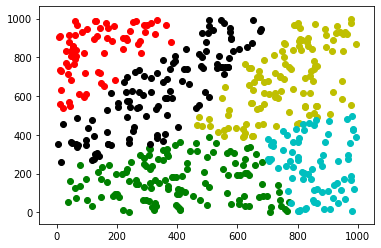

In [46]:
color = ['b','g','r','y','c','k','m']
fig = plt.figure()
ax  = fig.add_subplot(111)
for i in range(1,6):
    lst = []
    col = color[i]
    for j in range(len(data)):
        if cluster[j]==i:
            lst.append(data[j])
    lst = pd.DataFrame(lst)
    ax.scatter(lst[0],lst[1],c=col)
plt.show()